In [1]:
from gensim.models.ldamodel import LdaModel
import pandas as pd
from gensim import corpora, models
from gensim.models import CoherenceModel


In [2]:
df=pd.read_pickle('./pandas_data_candidatos_lda.pd')
lda_model = LdaModel.load('./lda_models/lda_model_precandi_m40')
#dictionary= corpora.Dictionary.load('./lda_models/candidatos45.dict')
                                    
texts=[]
for a in df.Text_clean:
    texts.append(a.split())
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [4]:
cohe_cv = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')

In [5]:
cohe_cv.get_coherence()

0.5139542309821689

In [3]:
df.tail(5)

,Candidato,Date_doc,Id_doc,Mes,Text,Title,Weights_kbs,Text_clean,abreviatura
125,Henrique Meirelles,2018-09-25,2,setembro,﻿[Música] eleições de 2018 escolher a tui con...,Sabatina Linha de Frente_ Henrique Meirelles,20895,eleições escolher tui confirme compromisso ouv...,Henr_set_2
283,Alvaro Dias,2018-09-25,2,setembro,﻿o brasil está numa situação econômica que nã...,"Álvaro Dias, do Podemos, fala a EXAME",12218,situação econômica agradáveis upa saindo reces...,Alva_set_2
495,Geraldo Alckmin,2018-09-25,2,setembro,﻿pensando a ai vai começar ae esse banheiro s...,Geraldo Alckmin - Pânico - 25_09_18,70488,pensando começar banheiro esquece chuva sol mi...,Gera_set_2
182,Joao Amoedo,2018-09-28,3,setembro,﻿nós temos a visita do candidato à presidênci...,João Amoêdo em Novo Hamburgo_ _Nós contra eles...,12704,visita presidência feita carlos ayres jornal n...,Joao_set_3
4,Guilherme Boulos,2018-09-28,1,setembro,﻿a mãe e sua avó ai começar já esse banheiro ...,Guilherme Boulos - Pânico - 28_09_18,82900,mãe avó começar banheiro esquece iriam chuva s...,Guil_set_1


In [10]:
x=lda_model.show_topics(num_topics=45, num_words=20,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Only Words 
for topic,words in topics_words:
    print('Topic '+str(topic)+': '+', '.join(words))

Topic 0: preço, petrobras, petróleo, empresa, privatização, empresas, gasolina, preços, caminhoneiros, greve, combustível, privatizar, mercado, estatal, energia, venezuela, aumento, eletrobrás, interesse, crise
Topic 1: dinheiro, bancos, milhões, banco, colocar, bilhões, levy, chamado, passado, nação, prtb, naturalmente, família, tirar, creio, mão, pagar, dilma_rousseff, fundo, daqui
Topic 2: previdência, reforma, aposentadoria, trabalhista, congresso, pagar, idade, fiscal, contas, eleitoral, setor, inflação, mínima, feita, regime, conta, trabalhador, presidência, fundo, teto
Topic 3: liberdade, joão, idéias, fundo, fundamental, contas, interessante, televisão, mudanças, econômica, montar, participação, principal, renovação, valores, participar, sentido, deveria, difícil, responsabilidade
Topic 4: situação, marina_silva, energia, educação, milhões, rede, ambiente, base, crise, políticas, compromisso, visão, criar, problemas, existem, vida, vivendo, ajudar, sustentável, sustentabilidade

In [3]:
def get_ldav(corpusList):
    list_vects_lda=[]
    for i in corpusList:
        tp=lda_model.get_document_topics(i, minimum_probability=0.00)
        f=[list(t) for t in zip(*tp)]
        list_vects_lda.append(f[1])
    return list_vects_lda

In [4]:
vec_lda=get_ldav(corpus)

In [6]:
vec_lda[100]

[0.0230796496264608,
 0.010298577277296325,
 0.029015338486976048,
 0.004096018960124203,
 0.004354705278159179,
 0.01606672572559707,
 0.023202417884014098,
 0.016431976775305807,
 0.02024517543254239,
 0.028848679088655106,
 0.019291596954592045,
 0.04126509108961652,
 0.024998152857880727,
 0.06717459076171833,
 0.028988024812304045,
 0.040250706668049516,
 0.00894610783194914,
 0.015431696099983556,
 0.03850599527292769,
 0.00816143027126766,
 0.019866074379462792,
 0.027695716128390894,
 0.009118471492778599,
 0.015970280743421873,
 0.01920427038811504,
 0.010553150913499803,
 0.08468378800021177,
 0.09004931290424634,
 0.010920012634632196,
 0.04088335019137355,
 0.01818719946946084,
 0.017747280993946648,
 0.01803300282057199,
 0.011415802180143578,
 0.0406027204412715,
 0.010964523272659081,
 0.034997472624384574,
 0.023229279263288126,
 0.015422647401153684,
 0.01180298660156666]

In [87]:
import numpy as np
def generate_topic_evolution(topic, lda_vector, window=2): #el vector puede ser de un candidato o general
    #topic_probabilties=[x[topic] for x in lda_vector]
    topic_probabilties=np.array(f)
    pos=window-1
    serie=[0]*len(topic_probabilties)
    for i in range(0,len(topic_probabilties)):
        if i>=window-1:
            media=sum(topic_probabilties[i-pos:i-pos+window])/window
            serie[i]=media
    print(serie)

In [88]:
generate_topic_evolution(3,f)

[0, 3.5, 3.5, 2.5, 3.5, 3.0, 1.0, 2.5]


In [28]:
f

[2, 5, 2, 3, 4, 2, 0, 5]

In [19]:
dff= pd.DataFrame({'ja': f})
dff['MA1_edu'] = dff['ja'].rolling(window=3,center=False).mean()

In [20]:
dff

,ja,MA1_edu
0,2,NaN
1,5,NaN
2,2,3.000000
3,3,3.333333
4,4,3.000000
5,2,3.000000
6,0,2.000000
7,5,2.333333


In [89]:
list_vects_lda=get_ldav(corpus)
df['education']=[x[1] for x in list_vects_lda]
df['MA1_edu'] = df['education'].rolling(window=10,center=False).mean()
#df['municipios']=[x[35] for x in list_vects_lda]
#df['MA1_muni'] = df['municipios'].rolling(window=10,center=False).mean()

In [96]:
list_vects_lda=get_ldav(corpus)
df['petrobras']=[x[24] for x in list_vects_lda]
df['MA1_pbr'] = df['petrobras'].rolling(window=10,center=False).mean()

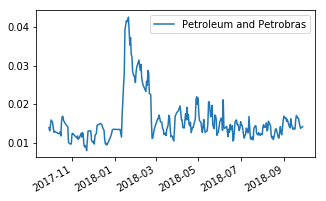

In [97]:
import matplotlib.pyplot as plt
ts_geral= pd.Series(dict(zip(df['Date_doc'],df['MA1_pbr'])))
fig = plt.figure(figsize=(5,3))
ts_geral.plot(label='Petroleum and Petrobras')
plt.legend(loc='best')

In [43]:
list_vects_lda=get_ldav(corpus)
df['aborto']=[x[23] for x in list_vects_lda]
df['MA1_abort'] = df['aborto'].rolling(window=10,center=False).mean()

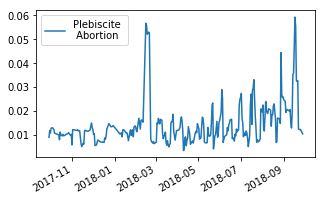

In [95]:
import matplotlib.pyplot as plt
ts_geral= pd.Series(dict(zip(df['Date_doc'],df['MA1_abort'])))
fig = plt.figure(figsize=(5,3))
ts_geral.plot(label='Plebiscite \n Abortion')
plt.legend(loc='best')

In [109]:
list_vects_lda=get_ldav(corpus)
df['naturalesa']=[x[30] for x in list_vects_lda]
df['MA1_natu'] = df['naturalesa'].rolling(window=10,center=False).mean()

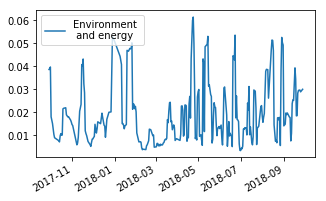

In [110]:
ts_geral= pd.Series(dict(zip(df['Date_doc'],df['MA1_natu'])))
fig = plt.figure(figsize=(5,3))
ts_geral.plot(label='Environment \n and energy')
plt.legend(loc='best')

In [113]:
list_vects_lda=get_ldav(corpus)
df['seguridad']=[x[10] for x in list_vects_lda]
df['MA1_segur'] = df['seguridad'].rolling(window=10,center=False).mean()

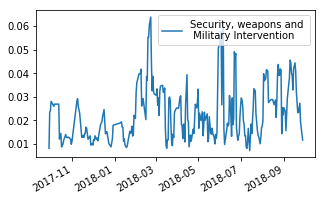

In [114]:
import matplotlib.pyplot as plt
ts_geral= pd.Series(dict(zip(df['Date_doc'],df['MA1_segur'])))
fig = plt.figure(figsize=(5,3))
ts_geral.plot(label='Security, weapons and \n Military Intervention')
plt.legend(loc='best')

In [115]:
df['lula']=[x[8] for x in list_vects_lda]
df['MA1_lula'] = df['lula'].rolling(window=10,center=False).mean()

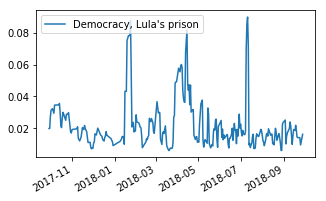

In [118]:
ts_geral= pd.Series(dict(zip(df['Date_doc'],df['MA1_lula'])))
fig = plt.figure(figsize=(5,3))
ts_geral.plot(label='Democracy, Lula\'s prison')
plt.legend(loc='best')

### Entre candidatos

In [176]:
df['MA_bol'] = df[df.Candidato=='Bolsonaro']['education'].rolling(window=10,center=False).mean()
df['MA_mar'] = df[df.Candidato=='Marina silva']['education'].rolling(window=10,center=False).mean()
df['MA_cir'] = df[df.Candidato=='Ciro Gomes']['education'].rolling(window=10,center=False).mean()
df['MA_alv'] = df[df.Candidato=='Alvaro Dias']['education'].rolling(window=10,center=False).mean()

In [177]:
ts_bol= pd.Series(dict(zip(df[df.Candidato=='Bolsonaro']['Date_doc'],df[df.Candidato=='Bolsonaro']['MA_bol'])))
ts_mar= pd.Series(dict(zip(df[df.Candidato=='Marina silva']['Date_doc'],df[df.Candidato=='Marina silva']['MA_mar'])))
ts_cir= pd.Series(dict(zip(df[df.Candidato=='Ciro Gomes']['Date_doc'],df[df.Candidato=='Ciro Gomes']['MA_cir'])))
ts_alv= pd.Series(dict(zip(df[df.Candidato=='Alvaro Dias']['Date_doc'],df[df.Candidato=='Alvaro Dias']['MA_alv'])))

Text(0.5, 0.98, 'Education in schools')

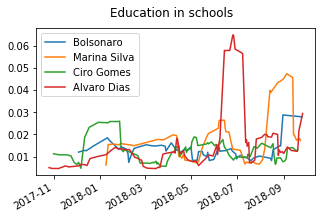

In [178]:
fig = plt.figure(figsize=(5,3))
ts_bol.plot(label='Bolsonaro')
ts_mar.plot(label='Marina Silva')
ts_cir.plot(label='Ciro Gomes')
ts_alv.plot(label='Alvaro Dias')
plt.legend(loc='best')
plt.suptitle("Education in schools")

In [179]:
df['MA_bol'] = df[df.Candidato=='Bolsonaro']['seguridad'].rolling(window=10,center=False).mean()
df['MA_mar'] = df[df.Candidato=='Marina silva']['seguridad'].rolling(window=10,center=False).mean()
df['MA_cir'] = df[df.Candidato=='Ciro Gomes']['seguridad'].rolling(window=10,center=False).mean()
df['MA_alv'] = df[df.Candidato=='Alvaro Dias']['seguridad'].rolling(window=10,center=False).mean()
ts_bol= pd.Series(dict(zip(df[df.Candidato=='Bolsonaro']['Date_doc'],df[df.Candidato=='Bolsonaro']['MA_bol'])))
ts_mar= pd.Series(dict(zip(df[df.Candidato=='Marina silva']['Date_doc'],df[df.Candidato=='Marina silva']['MA_mar'])))
ts_cir= pd.Series(dict(zip(df[df.Candidato=='Ciro Gomes']['Date_doc'],df[df.Candidato=='Ciro Gomes']['MA_cir'])))
ts_alv= pd.Series(dict(zip(df[df.Candidato=='Alvaro Dias']['Date_doc'],df[df.Candidato=='Alvaro Dias']['MA_alv'])))

Text(0.5, 0.98, 'Security, weapons and Military Intervention')

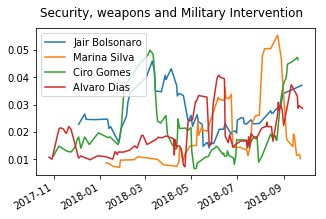

In [180]:
fig = plt.figure(figsize=(5,3))
ts_bol.plot(label='Jair Bolsonaro')
ts_mar.plot(label='Marina Silva')
ts_cir.plot(label='Ciro Gomes')
ts_alv.plot(label='Alvaro Dias')
plt.legend(loc='best')
plt.suptitle("Security, weapons and Military Intervention")

In [159]:
df['MA_bol'] = df[df.Candidato=='Bolsonaro']['petrobras'].rolling(window=10,center=False).mean()
df['MA_mar'] = df[df.Candidato=='Marina silva']['petrobras'].rolling(window=10,center=False).mean()
df['MA_cir'] = df[df.Candidato=='Ciro Gomes']['petrobras'].rolling(window=10,center=False).mean()
df['MA_alv'] = df[df.Candidato=='Alvaro Dias']['petrobras'].rolling(window=10,center=False).mean()
ts_bol= pd.Series(dict(zip(df[df.Candidato=='Bolsonaro']['Date_doc'],df[df.Candidato=='Bolsonaro']['MA_bol'])))
ts_mar= pd.Series(dict(zip(df[df.Candidato=='Marina silva']['Date_doc'],df[df.Candidato=='Marina silva']['MA_mar'])))
ts_cir= pd.Series(dict(zip(df[df.Candidato=='Ciro Gomes']['Date_doc'],df[df.Candidato=='Ciro Gomes']['MA_cir'])))
ts_alv= pd.Series(dict(zip(df[df.Candidato=='Alvaro Dias']['Date_doc'],df[df.Candidato=='Alvaro Dias']['MA_alv'])))

Text(0.5, 0.98, 'Petroleum and Petrobras')

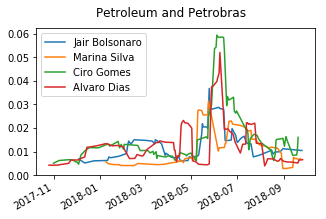

In [160]:
fig = plt.figure(figsize=(5,3))
ts_bol.plot(label='Jair Bolsonaro')
ts_mar.plot(label='Marina Silva')
ts_cir.plot(label='Ciro Gomes')
ts_alv.plot(label='Alvaro Dias')
plt.legend(loc='best')
plt.suptitle("Petroleum and Petrobras")

In [ ]:
#naturalesa

In [170]:
df['MA_bol'] = df[df.Candidato=='Bolsonaro']['naturalesa'].rolling(window=10,center=False).mean()
df['MA_mar'] = df[df.Candidato=='Marina silva']['naturalesa'].rolling(window=10,center=False).mean()
df['MA_cir'] = df[df.Candidato=='Ciro Gomes']['naturalesa'].rolling(window=10,center=False).mean()
df['MA_alv'] = df[df.Candidato=='Alvaro Dias']['naturalesa'].rolling(window=10,center=False).mean()
ts_bol= pd.Series(dict(zip(df[df.Candidato=='Bolsonaro']['Date_doc'],df[df.Candidato=='Bolsonaro']['MA_bol'])))
ts_mar= pd.Series(dict(zip(df[df.Candidato=='Marina silva']['Date_doc'],df[df.Candidato=='Marina silva']['MA_mar'])))
ts_cir= pd.Series(dict(zip(df[df.Candidato=='Ciro Gomes']['Date_doc'],df[df.Candidato=='Ciro Gomes']['MA_cir'])))
ts_alv= pd.Series(dict(zip(df[df.Candidato=='Alvaro Dias']['Date_doc'],df[df.Candidato=='Alvaro Dias']['MA_alv'])))

Text(0.5, 0.98, 'Environment and energy')

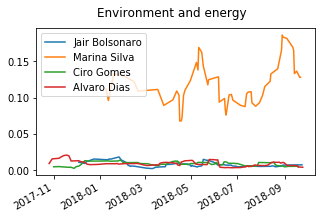

In [172]:
fig = plt.figure(figsize=(5,3))
ts_bol.plot(label='Jair Bolsonaro')
ts_mar.plot(label='Marina Silva')
ts_cir.plot(label='Ciro Gomes')
ts_alv.plot(label='Alvaro Dias')
plt.legend(loc='best')
plt.suptitle("Environment and energy")

In [174]:
df['MA_bol'] = df[df.Candidato=='Bolsonaro']['lula'].rolling(window=10,center=False).mean()
df['MA_mar'] = df[df.Candidato=='Marina silva']['lula'].rolling(window=10,center=False).mean()
df['MA_cir'] = df[df.Candidato=='Ciro Gomes']['lula'].rolling(window=10,center=False).mean()
df['MA_alv'] = df[df.Candidato=='Alvaro Dias']['lula'].rolling(window=10,center=False).mean()
ts_bol= pd.Series(dict(zip(df[df.Candidato=='Bolsonaro']['Date_doc'],df[df.Candidato=='Bolsonaro']['MA_bol'])))
ts_mar= pd.Series(dict(zip(df[df.Candidato=='Marina silva']['Date_doc'],df[df.Candidato=='Marina silva']['MA_mar'])))
ts_cir= pd.Series(dict(zip(df[df.Candidato=='Ciro Gomes']['Date_doc'],df[df.Candidato=='Ciro Gomes']['MA_cir'])))
ts_alv= pd.Series(dict(zip(df[df.Candidato=='Alvaro Dias']['Date_doc'],df[df.Candidato=='Alvaro Dias']['MA_alv'])))

Text(0.5, 0.98, 'Environment and energy')

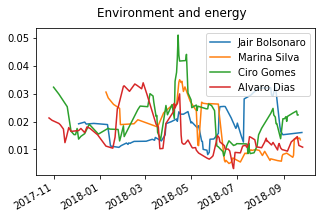

In [175]:
fig = plt.figure(figsize=(5,3))
ts_bol.plot(label='Jair Bolsonaro')
ts_mar.plot(label='Marina Silva')
ts_cir.plot(label='Ciro Gomes')
ts_alv.plot(label='Alvaro Dias')
plt.legend(loc='best')
plt.suptitle("Environment and energy")

In [98]:
df.head(2)

,Candidato,Date_doc,Id_doc,Mes,Text,Title,Weights_kbs,Text_clean,abreviatura,educacion,MA1_edu,petrobras,MA1_pbr,aborto,MA1_abort,MA_bol,MA_mar,MA_cir,MA_alv
392,Alvaro Dias,2017-07-05,1,antigo,﻿o senhor é um pré-candidato à presidência os...,Alvaro Dias conta suas propostas para 2018,3395,presidência seguidores ouvi evento poderoso fa...,Alva_ant_1,0.007226,NaN,0.006848,NaN,0.042580,NaN,NaN,NaN,NaN,NaN
670,Ciro Gomes,2017-08-09,2,antigo,﻿o banheiro não esquece o microfone ligado no...,Ciro Gomes - Pânico -,60115,banheiro esquece microfone querer volta progra...,Ciro_ant_2,0.012234,NaN,0.003848,NaN,0.005769,NaN,NaN,NaN,NaN,NaN


In [ ]:
lda.get_document_topics(dictionary.doc2bow(text))

pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

In [5]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx, " ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [6]:
print_top_words(lda_model, tf_feature_names, 10)

NameError: name 'tf_feature_names' is not defined

#### Built model LDA mallet

In [1]:
from gensim import corpora, models
import gensim
from gensim.models import CoherenceModel
import pandas as pd

#df=pd.read_pickle('./pandas_data_candidatos__premas.pd') normal
df=pd.read_pickle('./pandas_data_candidatos_premas_lema.pd')

texts=[]
for a in df.Text:
    texts.append(a.split())
    
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
#

In [2]:
k2=[]
def compute_coherence_values2(dictionary, corpus, texts, limit, start, step=1):
    coherencemodel_cv = []
    coherencemodel_umass=[]
    model_list2 = []
    mallet_path = '/home/kid/Documentos/LMCD/mallet-2.0.8/mallet-2.0.8/bin/mallet' # update this path
    for num_topics in range(start, limit, step):
        k2.append(str(num_topics))
        model=gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary,workers=4)
        print('Terminado model k= '+str(num_topics))
        model_list2.append(model)
        cohe_cv = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
        #cohe_umass = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherencemodel_cv.append(cohe_cv.get_coherence())
        #coherencemodel_umass.append(cohe_umass.get_coherence())

    return model_list2, coherencemodel_cv, coherencemodel_umass

In [20]:
modelLists=[]
ch_cvLists=[]
ch_umssLists=[]
for it in range(1):
    model_list, ch_cv, ch_umss = compute_coherence_values2(dictionary, corpus, texts, start=50, limit=61, step=4)
    modelLists.append(model_list)
    ch_cvLists.append(ch_cv)
    #ch_umssLists.append(ch_umss)

Terminado model k= 50
Terminado model k= 54
Terminado model k= 58


In [21]:
ch_cvLists

[[0.40579408062816463, 0.3975692927385773, 0.3995534150740454]]

In [8]:
maxi=0
modelmas=None
i=0
for c, m in zip(ch_cvLists[0],modelLists[0]):
    if c>maxi:
        i=i+1
        maxi=c
        modelmas=m

# gana 1

In [22]:
modelLists[0][2].show_topics(num_topics=100, formatted=False)

[(0,
  [('município', 0.059428950863213814),
   ('prefeito', 0.030931828242585214),
   ('recurso', 0.023793714032757856),
   ('saudar', 0.023517042939353697),
   ('estar', 0.022465692784417884),
   ('educação', 0.021801682160247898),
   ('federal', 0.01909030544488712),
   ('união', 0.01693227091633466),
   ('federativo', 0.013944223107569721),
   ('saneamento', 0.012726870296591412)]),
 (1,
  [('reformar', 0.025583550016438028),
   ('corrupção', 0.018799127290116263),
   ('poder', 0.01766340894826504),
   ('congresso', 0.015033324367135897),
   ('proposto', 0.014585014495352521),
   ('paraná', 0.014076929973998028),
   ('mudar', 0.01404704264921247),
   ('mudança', 0.013509070803072417),
   ('combater', 0.012761887683433455),
   ('dia', 0.012761887683433455)]),
 (2,
  [('oportunidade', 0.0215693018228271),
   ('futurar', 0.019309192747997837),
   ('viver', 0.017147349285117672),
   ('agradecer', 0.016950818061219477),
   ('acreditar', 0.014739841792364762),
   ('olhar', 0.013364123225

In [9]:
from gensim.models.ldamodel import LdaModel
import numpy

def convertldaGenToldaMallet(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0, iterations=1000,
        gamma_threshold=0.001,
        dtype=numpy.float64
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [23]:
modeloLDA=convertldaGenToldaMallet(modelLists[0][2])

In [24]:
modeloLDA.save('./lda_models/lda_model_precandi_m58lema')

In [110]:
modeloLDA.state.get_lambda()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
modeloLDA.print_topics(num_topics=50 ,num_words=10)

[(0,
  '0.009*"social" + 0.009*"movimento" + 0.008*"esquerda" + 0.007*"democracia" + 0.007*"enfrentar" + 0.006*"sociais" + 0.006*"congresso" + 0.006*"medo" + 0.006*"moradia" + 0.006*"projeto"'),
 (1,
  '0.027*"segurança" + 0.021*"polícia" + 0.016*"federal" + 0.015*"violência" + 0.014*"lei" + 0.014*"crime" + 0.008*"preso" + 0.008*"direito" + 0.007*"drogas" + 0.007*"ministério"'),
 (2,
  '0.015*"economia" + 0.010*"inflação" + 0.009*"banco_central" + 0.008*"crescimento" + 0.007*"condições" + 0.007*"previdência" + 0.006*"crescer" + 0.006*"história" + 0.006*"fazenda" + 0.006*"emprego"'),
 (3,
  '0.010*"ceará" + 0.010*"ciro_gomes" + 0.010*"milhões" + 0.006*"bilhões" + 0.006*"dilma_rousseff" + 0.005*"dinheiro" + 0.005*"nacional" + 0.004*"dívida" + 0.004*"saúde" + 0.004*"popular"'),
 (4,
  '0.011*"nacional" + 0.008*"economia" + 0.008*"indústria" + 0.007*"china" + 0.007*"desenvolvimento" + 0.007*"dólar" + 0.007*"modelo" + 0.007*"projeto" + 0.006*"consumo" + 0.006*"industrial"'),
 (5,
  '0.010*"

In [47]:
x=modeloLDA.show_topics(num_topics=45, num_words=20,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Only Words 
for topic,words in topics_words:
    print('Topic '+str(topic)+': '+', '.join(words))

Topic 0: federal, difícil, mudar, acredito, casa, construir, vida, sair, consegue, passado, principalmente, ambiente, ajudar, espaço, papel, conseguir, projeto, decisão, agenda, experiência
Topic 1: milhões, dinheiro, bancos, imposto, banco, bilhões, saúde, proposta, pagar, crédito, dívida, federal, economia, emprego, caixa, paga, tirar, conta, segurança, média
Topic 2: previdência, reforma, fiscal, dívida, orçamento, congresso, regime, lei, contribuição, setor, despesa, discutir, receita, bilhões, idade, salário, déficit, trabalhador, transição, mínima
Topic 3: segurança, polícia, drogas, violência, crime, intervenção, arma, armas, federal, tráfico, policiais, proposta, lei, polícias, combater, combate, aborto, inteligência, policial, países
Topic 4: turno, michel_temer, eleitoral, pesquisas, pmdb, votos, presidência, eleições, dilma_rousseff, psdb, centro, jair_bolsonaro, discurso, situação, congresso, esquerda, eleitor, programa, feita, cenário
Topic 5: congresso, reforma, dinheiro,